In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# Load dataset
df = pd.read_excel("Task_2_Dataset.xlsx")


In [3]:
# Rename for consistency
df.rename(columns={
    'subject_id': 'patient_id',
    'Age': 'age',
    'Outcome(Recovered-1/Not Recovered-0)': 'outcome'
}, inplace=True)



In [4]:
# View structure
df.head()

,patient_id,age,heart_rate,blood_pressure,oxygen_saturation,respiratory_rate,temperature,outcome
0,94297,50.0,93.0,94,98.0,39,36.0,1
1,94229,31.0,97.0,96,98.0,16,36.5,0
2,94195,32.0,82.0,96,97.0,25,36.3,1
3,94256,21.0,98.0,196,96.0,16,36.5,1
4,93996,33.0,98.0,92,99.0,28,37.2,1


In [5]:
df.info()
print("\nMissing values:\n", df.isnull().sum())
print("\nOutcome distribution:\n", df['outcome'].value_counts())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23468 entries, 0 to 23467
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patient_id         23468 non-null  int64  
 1   age                768 non-null    float64
 2   heart_rate         23468 non-null  float64
 3   blood_pressure     23468 non-null  int64  
 4   oxygen_saturation  23468 non-null  float64
 5   respiratory_rate   23468 non-null  int64  
 6   temperature        23468 non-null  float64
 7   outcome            23468 non-null  int64  
dtypes: float64(4), int64(4)
memory usage: 1.4 MB

Missing values:
 patient_id               0
age                  22700
heart_rate               0
blood_pressure           0
oxygen_saturation        0
respiratory_rate         0
temperature              0
outcome                  0
dtype: int64

Outcome distribution:
 outcome
1    17534
0     5934
Name: count, dtype: int64


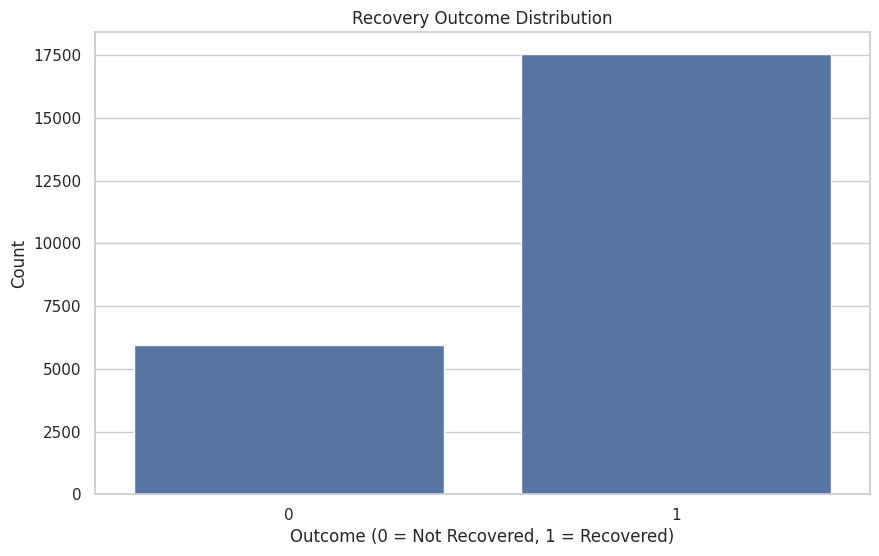

In [6]:
# Outcome count plot
sns.countplot(x='outcome', data=df)
plt.title("Recovery Outcome Distribution")
plt.xlabel("Outcome (0 = Not Recovered, 1 = Recovered)")
plt.ylabel("Count")
plt.show()

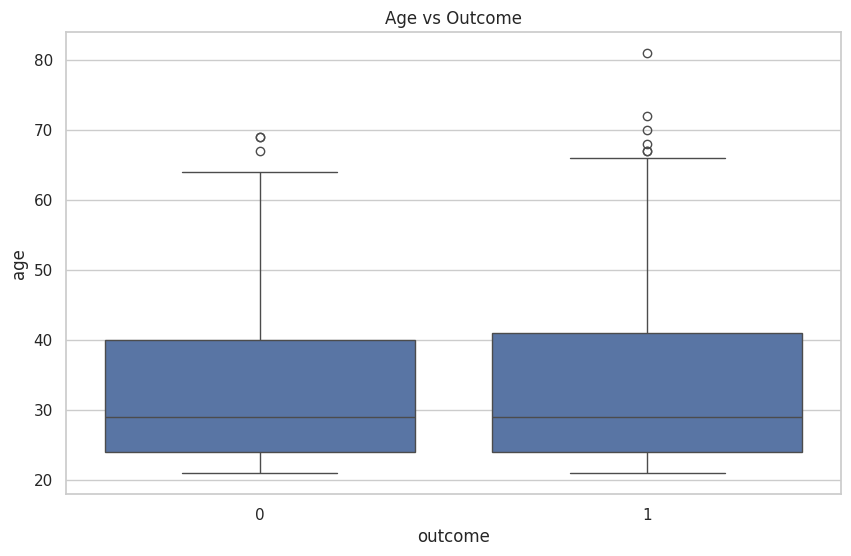

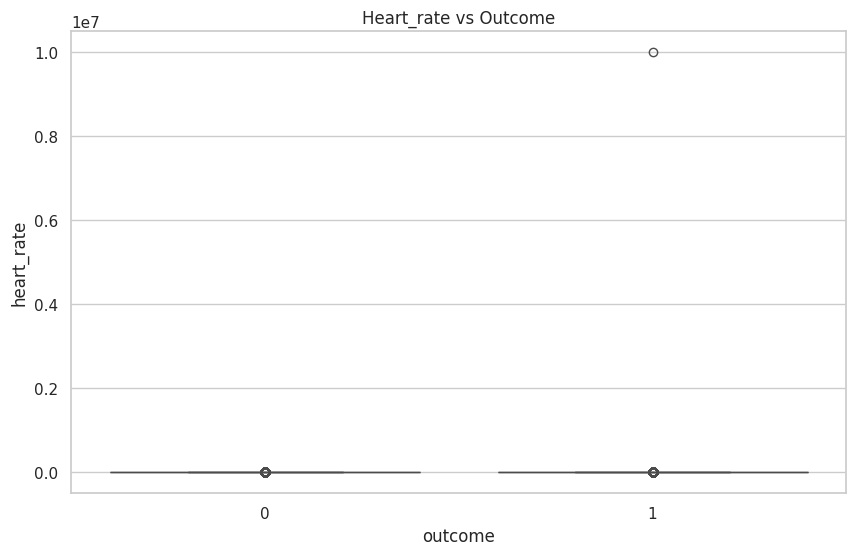

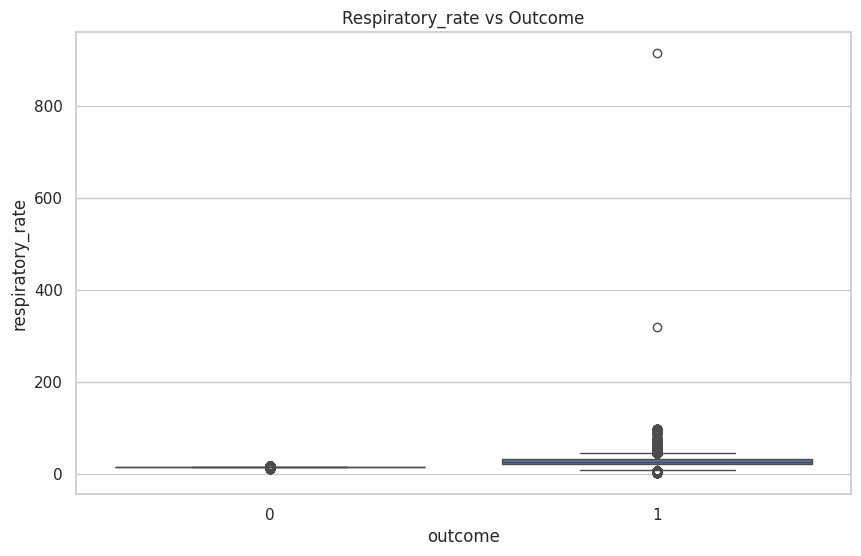

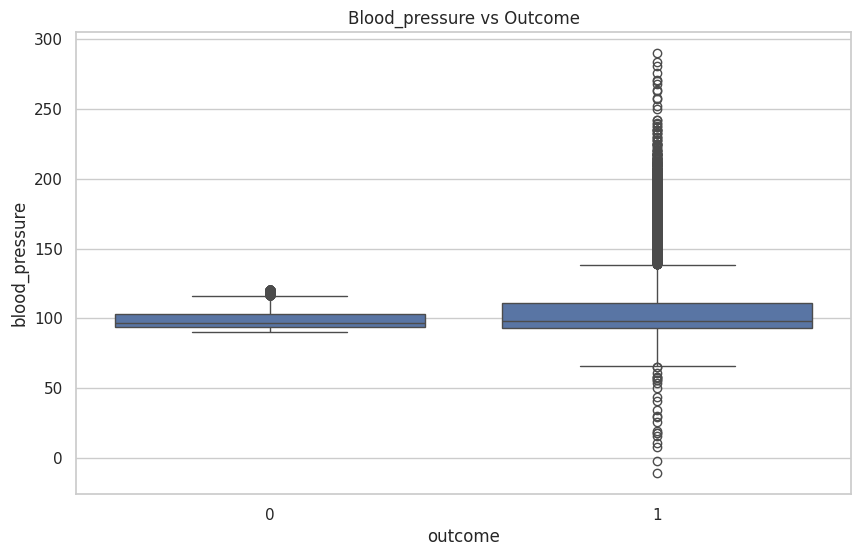

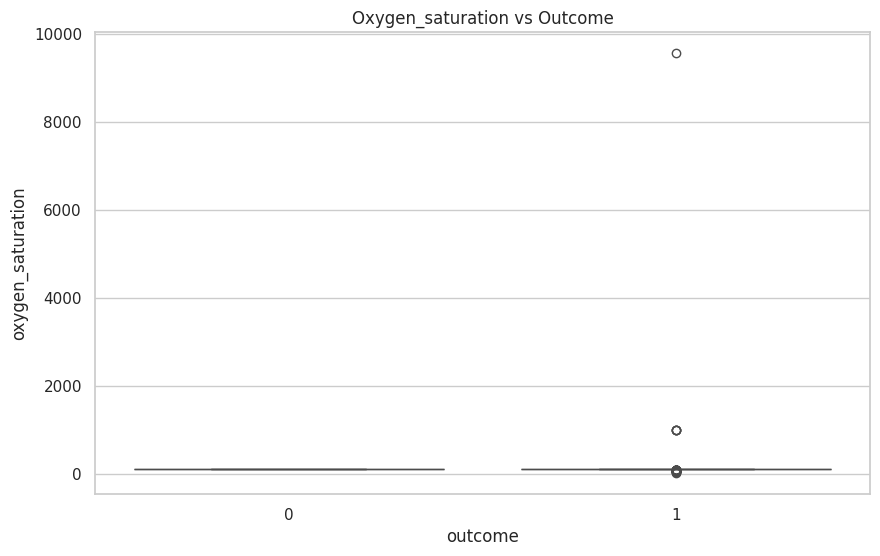

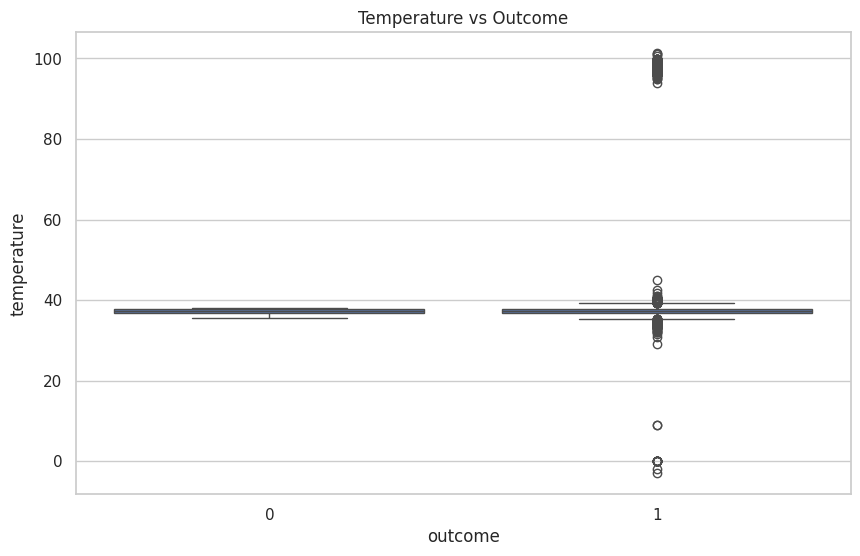

In [7]:
#boxplot
for col in ['age', 'heart_rate', 'respiratory_rate', 'blood_pressure', 'oxygen_saturation', 'temperature']:
    sns.boxplot(x='outcome', y=col, data=df)
    plt.title(f"{col.capitalize()} vs Outcome")
    plt.show()

In [8]:
# Drop rows with missing values
df.dropna(inplace=True)


In [9]:
# Features & target
X = df.drop(['patient_id', 'outcome'], axis=1)
y = df['outcome']


In [10]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
#logistic regression
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred_lr = lr.predict(X_test_scaled)


In [13]:
# logistic regression output
print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC Score:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))


Logistic Regression:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        55
           1       0.96      0.87      0.91        99

    accuracy                           0.89       154
   macro avg       0.88      0.90      0.88       154
weighted avg       0.90      0.89      0.89       154

ROC-AUC Score: 0.8921946740128558


In [14]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [15]:
# random forest outcome
print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))


Random Forest:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        55
           1       1.00      0.98      0.99        99

    accuracy                           0.99       154
   macro avg       0.98      0.99      0.99       154
weighted avg       0.99      0.99      0.99       154

ROC-AUC Score: 0.9988980716253443


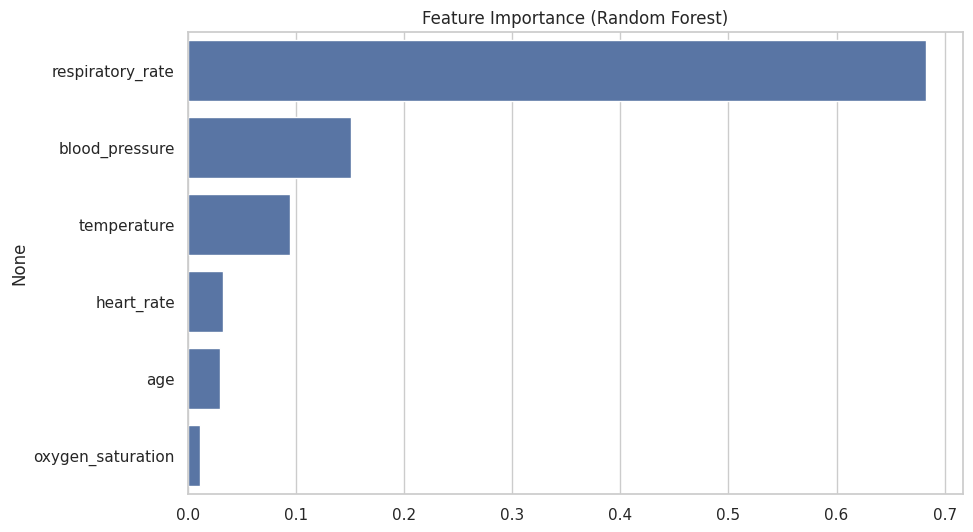

In [16]:
# Feature importance
feat_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [17]:
# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr.predict_proba(X_test_scaled)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

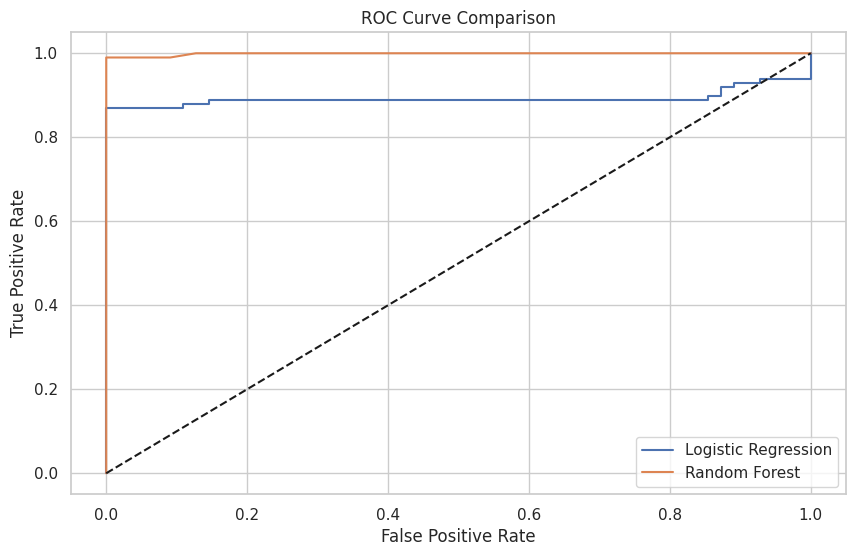

In [18]:
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve Comparison")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()